In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,12)})

In [2]:
tweets = pd.read_csv('pol_tweets.csv')
tweets.head()

,conversation_id,created_at,date,hashtags,id,likes_count,link,name,place,replies_count,...,retweet_id,retweets_count,time,timezone,tweet,urls,user_id,user_rt,user_rt_id,username
0,1276394982811807745,1593151252000,2020-06-26,['#dkpol'],1276394982811807745,13,https://twitter.com/JosephineFock/status/12763...,Josephine Fock,NaN,0,...,NaN,3,08:00:52,"Rom, sommertid",Hvorfor går man ikke i dialog med ⁦@DRC_dk⁩ i ...,['https://jyllands-posten.dk/indland/ECE122480...,84389583,NaN,NaN,josephinefock
1,1276116154793295873,1593084775000,2020-06-25,[],1276116154793295873,12,https://twitter.com/JosephineFock/status/12761...,Josephine Fock,NaN,1,...,NaN,3,13:32:55,"Rom, sommertid",Alle tæller ❤️ https://twitter.com/cekicozlem/...,['https://twitter.com/cekicozlem/status/127603...,84389583,NaN,NaN,josephinefock
2,1275714928343728128,1592989115000,2020-06-24,[],1275714928343728128,13,https://twitter.com/JosephineFock/status/12757...,Josephine Fock,NaN,0,...,NaN,5,10:58:35,"Rom, sommertid",Det er så godt arbejde💚 https://twitter.com/fa...,['https://twitter.com/fannybroholm/status/1275...,84389583,NaN,NaN,josephinefock
3,1274847089961336836,1592782206000,2020-06-22,"['#dkpol', '#dkgreen']",1274847089961336836,42,https://twitter.com/JosephineFock/status/12748...,Josephine Fock,NaN,3,...,NaN,7,01:30:06,"Rom, sommertid","Tilfreds med den klima og energiaftale, der er...",[],84389583,NaN,NaN,josephinefock
4,1273948042475995138,1592567856000,2020-06-19,"['#dkpol', '#dkgreen']",1273948042475995138,21,https://twitter.com/JosephineFock/status/12739...,Josephine Fock,NaN,0,...,NaN,5,13:57:36,"Rom, sommertid",Godt første skridt for den fri natur #dkpol #d...,['https://www.altinget.dk/miljoe/artikel/werme...,84389583,NaN,NaN,josephinefock


# Brug af hashtags over tid

In [3]:
df = tweets.loc[:, ['id', 'date', 'hashtags', 'name', 'retweets_count']]
df['hashtags'] = df['hashtags'].apply(lambda str: str.replace("\'", "").strip('][').split(', '))

In [4]:
tweets_hashtags = df.hashtags.apply(pd.Series)

In [5]:
df = df.merge(tweets_hashtags, right_index = True, left_index = True).drop(columns = ['hashtags'])
df = df.melt(id_vars = ['id', 'date', 'name', 'retweets_count'], value_name = 'hashtag')
df['hashtag'] = df['hashtag'].replace("", np.NaN)
df = df.dropna()

In [6]:
df_time = df.groupby(['date', 'hashtag'])

In [7]:
df_timecount = df_time.size().to_frame(name = 'count').reset_index()
df_timecount['date'] = pd.to_datetime(df_timecount['date'], format='%Y-%m-%d')
df_timecount = df_timecount.loc[df_timecount['count'] > 5, :]

In [8]:
df_timecount.head()

,date,hashtag,count
3,2020-01-01,#dkpol,21
18,2020-01-03,#dkpol,7
22,2020-01-04,#dkpol,9
25,2020-01-04,#uddpol,6
30,2020-01-05,#dkpol,13


/opt/tljh/user/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


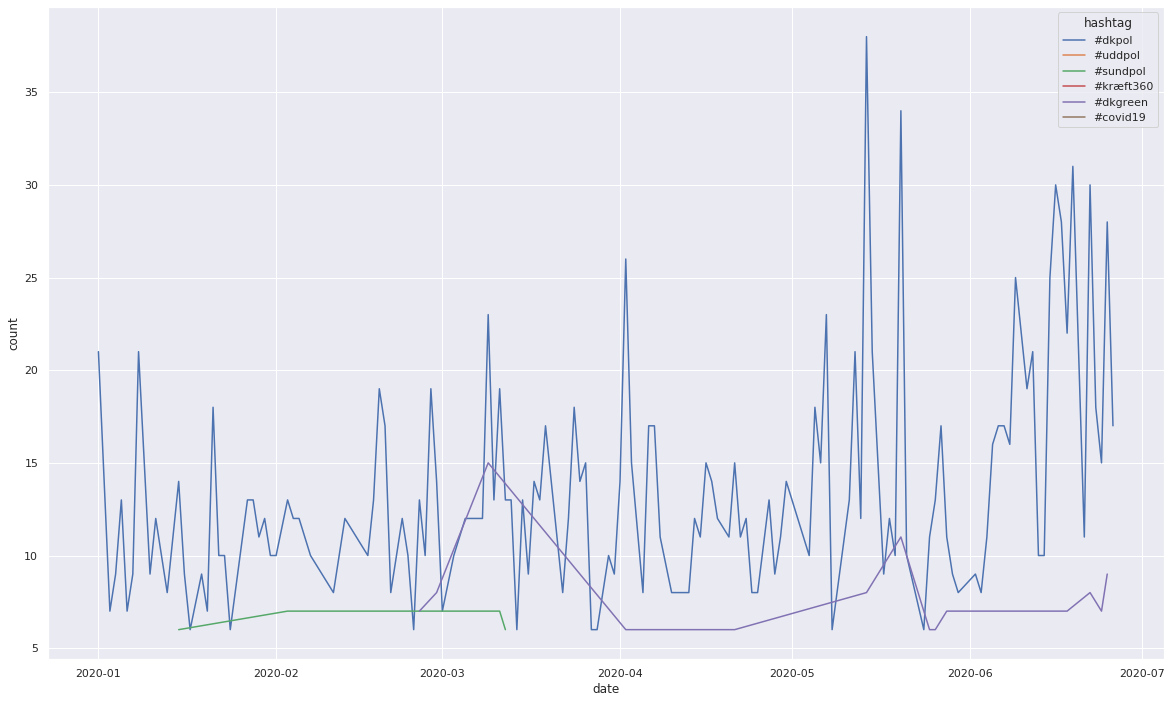

In [9]:
sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(data = df_timecount, x = 'date', y = 'count', hue = 'hashtag')

# Politikeres aktivitet

In [10]:
df = tweets.loc[:, ['id', 'date', 'name', 'retweets_count']]
df_user = df.groupby(['date', 'name']).size().to_frame(name = 'count').reset_index()
df_user['date'] = pd.to_datetime(df_user['date'], format='%Y-%m-%d')

df_user.head()

,date,name,count
0,2020-01-01,Jakob Ellemann-Jensen,2
1,2020-01-01,Kristian Thulesen Dahl,1
2,2020-01-01,Lise Bech 🇩🇰 DF,2
3,2020-01-01,Mette Abildgaard,8
4,2020-01-01,Mogens Jensen,2


In [11]:
df_usercount = df.groupby(['name']).size().to_frame(name = 'count').reset_index()

count_quant = np.quantile(df_usercount['count'], 0.50)

df_usercount['keep'] = np.where(df_usercount['count'] > count_quant, True, False)

In [12]:
df_user = df_user.merge(df_usercount.loc[:, ['name', 'keep']], on = 'name')
df_user_filter = df_user.loc[df_user['keep'] == True, :]
df_user_filter.head()

,date,name,count,keep
0,2020-01-01,Jakob Ellemann-Jensen,2,True
1,2020-01-06,Jakob Ellemann-Jensen,2,True
2,2020-01-08,Jakob Ellemann-Jensen,1,True
3,2020-01-09,Jakob Ellemann-Jensen,1,True
4,2020-01-11,Jakob Ellemann-Jensen,1,True


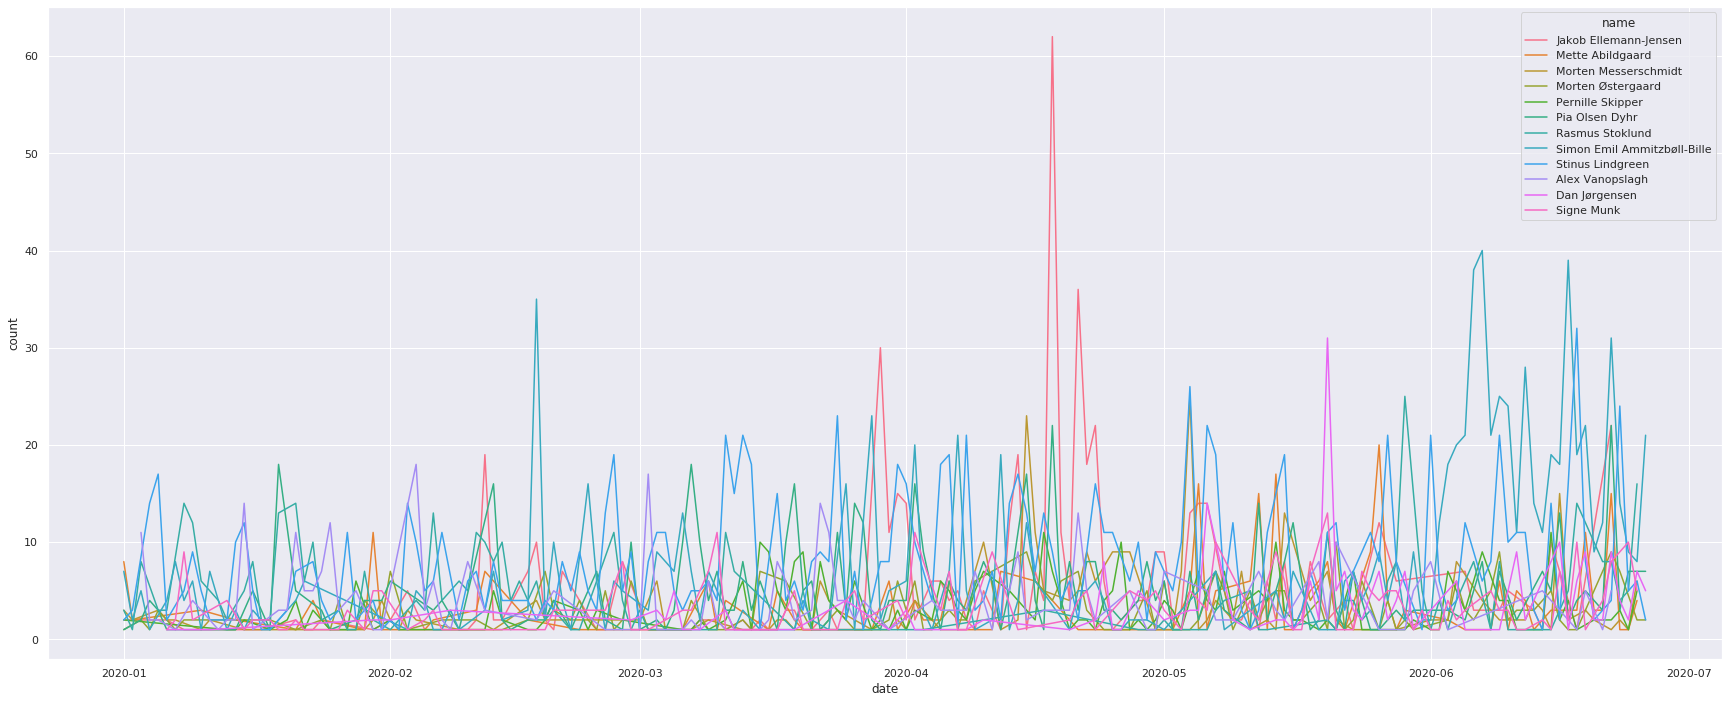

In [15]:
sns.set(rc={'figure.figsize':(30,12)})
sns.lineplot(data = df_user_filter, x = 'date', y = 'count', hue = 'name')
plt.savefig("tweets_user.png")